In [ ]:
!pip install  neuralprophet pmdarima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
# draw the data
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#imoprt model
import torch
import torch._dynamo
from neuralprophet import NeuralProphet
import prophet
from pmdarima.model_selection import train_test_split
from pmdarima.arima import ARIMA
from pmdarima.arima import auto_arima


# **pre_prosses data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Crimes_-_2001_to_Present.csv')
df.head()

In [ ]:
data.info()

In [ ]:
data = df.drop(["ID","Beat","Arrest","District","Case Number","Block","IUCR","Description",
                "Location Description","Arrest",	"Domestic",
                "Ward","FBI Code","X Coordinate","Y Coordinate",
                "Updated On","Location"],axis=1)
#data.set_index("date",inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date
#data.head()

<ipython-input-8-27f122f81c8c>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date

In [ ]:
day_incidents = data.groupby('Date').size().reset_index(name="crime_count")
day_incidents = day_incidents.rename(columns={"Date": "ds", "crime_count": "y"})
day_incidents.reset_index(inplace=True)
day_incidents.head()

,index,Date,y
0,0,2001-01-01,1825
1,1,2001-01-02,1143
2,2,2001-01-03,1151
3,3,2001-01-04,1166
4,4,2001-01-05,1267


# **forcasting prophet**

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ayyfvx4/7t2qsgfz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ayyfvx4/46win9gc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97904', 'data', 'file=/tmp/tmp2ayyfvx4/7t2qsgfz.json', 'init=/tmp/tmp2ayyfvx4/46win9gc.json', 'output', 'file=/tmp/tmp2ayyfvx4/prophet_model0wz_w3c1/prophet_model-20240215173137.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:31:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:31:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

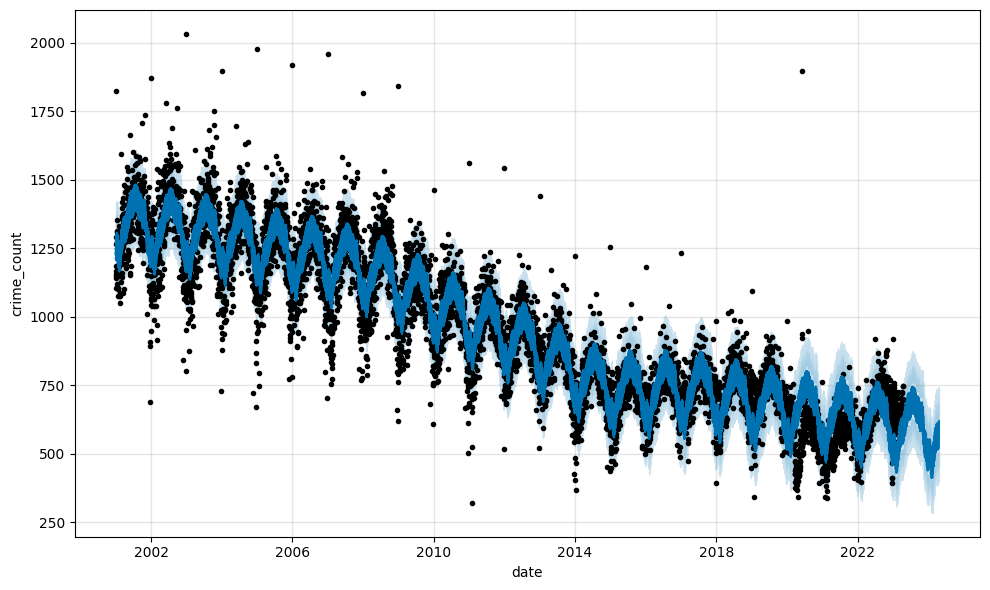

In [ ]:


mo = prophet.Prophet()
mo.fit(day_incidents)
fu = mo.make_future_dataframe(periods=365)
forcast = mo.predict(fu)
fig = mo.plot(forcast)
plt.xlabel("date")
plt.ylabel("crime_count")
plt.show()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one datafra

Finding best initial lr:   0%|          | 0/247 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.988% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib

Predicting: 128it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.988% of the data.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.in

Predicting: 128it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


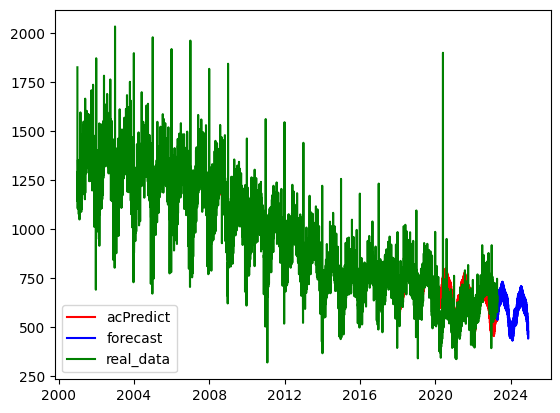

In [ ]:

modNp = NeuralProphet()
modNp.fit(day_incidents)

fu1 = modNp.make_future_dataframe(day_incidents, periods=600)
forecastNp = modNp.predict(fu1)
ac = modNp.predict(day_incidents)
plt.plot(ac['ds'], ac['yhat1'], label='acPredict',c='r')
plt.plot(forecastNp['ds'], forecastNp['yhat1'], label='forecast',c='b')
plt.plot(day_incidents['ds'],day_incidents['y'],label='real_data',c='g')
plt.legend()
#plt.xlabel('date')
#plt.ylabel('crime_count')
plt.show()


In [ ]:
modNp.plot_components(forecastNp)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:272: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)

  fcst = fcst.fillna(value=np.nan)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:398: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old beh

In [ ]:
modNp.plot(forecastNp)

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:92: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:94: FutureWarning:

The beha

In [ ]:
modNp.plot_parameters()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_model_parameters_plotly.py:233: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_model_parameters_plotly.py:267: FutureWarning:

The behavior of DatetimeProperties.t

In [ ]:
import pickle
with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(modNp, f)